# Text Mining(Elon-Musk Tweets)

Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [3]:
# Importing all required library
import re
import nltk
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('Elon_musk.csv', encoding = "latin-1")
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
## PREPROCESSING
## Lower Case
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'].head()


0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [6]:
## Removing Puncution
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df['Text'].head()

<ipython-input-6-42401c5871d6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [7]:
## Removing StopWords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'].head()


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [8]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(Text):
    return TextBlob(Text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(Text):
    return TextBlob(Text).sentiment.polarity
 
df['Subjectivity'] = df.Text.apply(calc_subj)
df['Polarity'] = df.Text.apply(calc_pola)
1
2
# let's have quick look to our dataset
df.head(10)

,Unnamed: 0,Text,Subjectivity,Polarity
0,1,kunalb11 im alien,0.750000,-0.250000
1,2,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.000000,0.000000
2,3,joerogan spotify great interview,0.750000,0.800000
3,4,gtera27 doge underestimated,0.000000,0.000000
4,5,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,6,happy new year ox httpstco9wfkmyu2oj,0.727273,0.468182
6,7,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,8,owensparks_ flcnhvy anonyx10 haha thanks,0.250000,0.200000
8,9,flcnhvy anonyx10 indeed tweets definitely repr...,0.500000,0.000000
9,10,entertaining outcome likely,0.850000,0.250000


In [9]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df['Sentiment'] = df.Polarity.apply(sentiment)
1
df.head()

,Unnamed: 0,Text,Subjectivity,Polarity,Sentiment
0,1,kunalb11 im alien,0.750000,-0.25,Negative
1,2,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.000000,0.00,Netural
2,3,joerogan spotify great interview,0.750000,0.80,Positive
3,4,gtera27 doge underestimated,0.000000,0.00,Netural
4,5,teslacn congratulations tesla china amazing ex...,0.322222,0.20,Positive


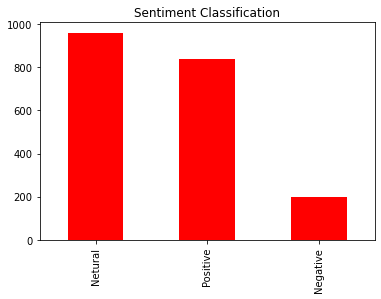

In [10]:
# let's see how many ratio of sentiment
df.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()


Text(0, 0.5, 'Subjectivity')

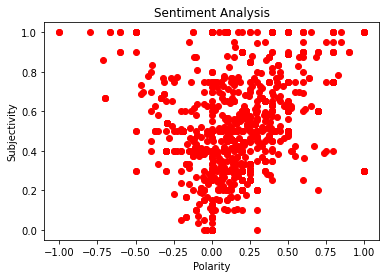

In [11]:
plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [12]:
# let's see the percentage of different sentiment's class
 
# Creat
Df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = df.Sentiment.value_counts()

Df_sentiment

,Sentiment,Total
Netural,48.024012,960
Positive,42.021011,840
Negative,9.954977,199
